In [1]:
#ladowanie biblioteki Pandas
import pandas as pd

In [3]:
#Zadanie 1
df = pd.read_csv('IHME_ORB_C19HSDS_2020_Y2020M12D03.CSV')
df
print(df.head())

# Sprawd podstawowe informacje o danych
print(df.info())

# Wywietl podstawowe statystyki opisowe
print(df.describe())


      SbjNum NetDuration InterviewTimeVStart InterviewTimeVEnd  \
0  133476254     0:10:14     7/17/2020 13:53   7/17/2020 14:26   
1  133281846     0:22:16     7/10/2020 12:53   7/10/2020 14:47   
2  133280780     0:19:23     7/10/2020 12:35   7/10/2020 12:54   
3  133281834     0:10:11     7/10/2020 10:21   7/10/2020 10:32   
4  133491249     0:09:59      7/18/2020 8:27    7/18/2020 8:39   

             Date  Srvyr  Country  LANG  R1  R1_5  ... G11_Other G11_99  \
0  7/17/2020 8:53   3232        2     1   9  15.0  ...       NaN    NaN   
1  7/10/2020 7:53   3206        2     4  12  22.0  ...       NaN    NaN   
2  7/10/2020 7:35   3202        2     3  10  13.0  ...       NaN    NaN   
3  7/10/2020 5:21   3212        2     1  12   9.0  ...       NaN    NaN   
4  7/18/2020 3:27   3225        2     3  11  28.0  ...       NaN    NaN   

   FinalOutcome  NumOfVisits  weight_combined kenya_weight  nigeria_weight  \
0             1            1         0.829860          NaN        0.829860

In [5]:
# Zadanie 2
mean_weight = df["kenya_weight"].mean()
print(f"Srednia waga kenya : {mean_weight}")

# Oblicz median dla kolumny ’dochd’
median_income = df["nigeria_weight"].median()
print(f"Mediana wagi nigeria: {median_income}")

# Oblicz odchylenie standardowe dla kolumny ’kenya_weight’
std_age = df["kenya_weight"].std()
print(f"Odchylenie standardowe wieku: {std_age}")


Srednia waga kenya : 0.999999999704591
Mediana wagi nigeria: 0.87235241
Odchylenie standardowe wieku: 0.5681490293617802


In [7]:
# Zadanie 3: Identyfikacja brakujących danych
missing_data_columns = df.isnull().sum()

# Uzupełnienie brakujących danych w kolumnie 'kenya_weight' średnią
df['kenya_weight'].fillna(mean_weight)

# Usunięcie wierszy z brakującymi danymi w kolumnie 'nigeria_weight'
df_cleaned = df.dropna(subset=['nigeria_weight'])

missing_data_columns, df_cleaned.head()

(SbjNum                    0
 NetDuration               0
 InterviewTimeVStart       0
 InterviewTimeVEnd         0
 Date                      0
                        ... 
 kenya_weight           2056
 nigeria_weight         2042
 southafrica_weight     2018
 agegroup                  0
 gk_weight                 0
 Length: 247, dtype: int64,
       SbjNum NetDuration InterviewTimeVStart InterviewTimeVEnd  \
 0  133476254     0:10:14     7/17/2020 13:53   7/17/2020 14:26   
 1  133281846     0:22:16     7/10/2020 12:53   7/10/2020 14:47   
 2  133280780     0:19:23     7/10/2020 12:35   7/10/2020 12:54   
 3  133281834     0:10:11     7/10/2020 10:21   7/10/2020 10:32   
 4  133491249     0:09:59      7/18/2020 8:27    7/18/2020 8:39   
 
              Date  Srvyr  Country  LANG  R1  R1_5  ... G11_Other G11_99  \
 0  7/17/2020 8:53   3232        2     1   9  15.0  ...       NaN    NaN   
 1  7/10/2020 7:53   3206        2     4  12  22.0  ...       NaN    NaN   
 2  7/10/2020 7:35   

In [9]:
# Zadanie 4 wykrywanie wartości odstających
# Oblicz IQR
Q1 = df['nigeria_weight'].quantile(0.25)
Q3 = df['nigeria_weight'].quantile(0.75)
IQR = Q3 - Q1

# Zidentyfikuj wartoci odstajce
outliers = df[(df['nigeria_weight'] < (Q1 - 1.5 * IQR)) | (df['nigeria_weight'] > (Q3 + 1.5 * IQR))]
print("Wartoci odstajce :")
print(outliers)

Wartoci odstajce :
         SbjNum NetDuration InterviewTimeVStart InterviewTimeVEnd  \
1     133281846     0:22:16     7/10/2020 12:53   7/10/2020 14:47   
3     133281834     0:10:11     7/10/2020 10:21   7/10/2020 10:32   
25    133341539     0:09:55      7/13/2020 9:15    7/13/2020 9:39   
43    133530487     0:13:07     7/19/2020 13:37   7/19/2020 13:52   
44    133617209     0:14:32      7/23/2020 9:25    7/23/2020 9:43   
...         ...         ...                 ...               ...   
983   133536715     0:10:23     7/19/2020 14:41   7/19/2020 15:09   
984   133172154     0:10:35      7/6/2020 21:37    7/6/2020 22:11   
1001  133292785     0:15:41     7/10/2020 16:37   7/10/2020 17:03   
1006  133509771     0:16:05     7/18/2020 20:15   7/18/2020 20:32   
1011  133350222     0:18:10     7/13/2020 11:03   7/13/2020 11:24   

                 Date  Srvyr  Country  LANG  R1  R1_5  ... G11_Other G11_99  \
1      7/10/2020 7:53   3206        2     4  12  22.0  ...       NaN    N

Macierz korelacji:
           gk_weight      R1_5
gk_weight   1.000000 -0.100199
R1_5       -0.100199  1.000000


<Axes: xlabel='gk_weight', ylabel='R1_5'>

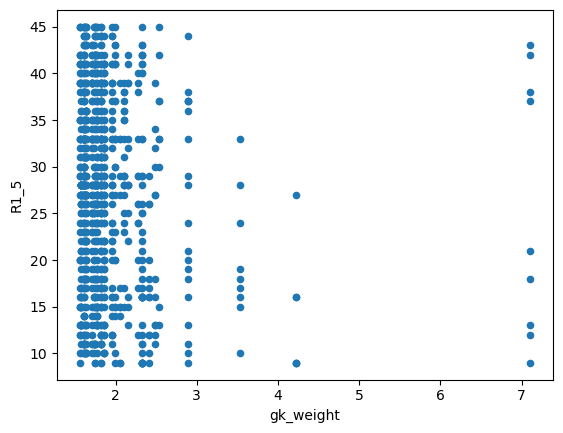

In [11]:
# Zadanie 5 analiza zależności między kolumnami
# Oblicz macierz korelacji
df_selected = df[['gk_weight', 'R1_5']]

correlation_matrix = df_selected.corr()
print("Macierz korelacji:")
print(correlation_matrix)

# Wykonaj wykres rozrzutu
df.plot.scatter(x='gk_weight', y='R1_5')


In [12]:
# Zadanie 6 Przekształcanie danych
# Tworzę pomocniczą kolumne duration_minutes która przedstawi dane z NetDuration w minutach 
df['duration_minutes'] = pd.to_timedelta(df['NetDuration']).dt.total_seconds() / 60

# Dodaje nowa kolumne "wielkosc_na_kraj
df['wielkosc_na_kraj'] = df['LANG'] / df['Country']

# Grupuj dane wedug kolumny agegroup i oblicz sredni czas wywiadu
grouped = df.groupby('agegroup')['duration_minutes'].mean()
print("Średni czas wywiadu według grupy wiekowej:")
print(grouped)

# Posortuj dane wedug kolumny agegroup
df_sorted = df.sort_values(by='agegroup', ascending=False)
print("Dane posortowane według grupy wiekowej:")
print(df_sorted.head())



Średni czas wywiadu według grupy wiekowej:
agegroup
1    11.994770
2    11.925174
3     9.903370
Name: duration_minutes, dtype: float64
Dane posortowane według grupy wiekowej:
         SbjNum NetDuration InterviewTimeVStart InterviewTimeVEnd  \
2506  133196471     0:12:41      7/7/2020 17:22    7/7/2020 17:35   
1677  133490122     0:07:41     7/18/2020 14:13   7/18/2020 14:44   
1679  133490003     0:11:03     7/18/2020 14:39   7/18/2020 14:50   
1680  133489273     0:08:35     7/18/2020 14:09   7/18/2020 14:18   
217   133519409     0:13:16     7/19/2020 12:02   7/19/2020 12:17   

                Date  Srvyr  Country  LANG  R1  R1_5  ... FinalOutcome  \
2506  7/7/2020 10:22   3002        1     1   3   NaN  ...            1   
1677  7/18/2020 8:13   3030        3     1  50   NaN  ...            1   
1679  7/18/2020 8:39   3022        3     1  52   NaN  ...            1   
1680  7/18/2020 8:09   3038        3     1  47   NaN  ...            1   
217   7/19/2020 7:02   3225        2   